**EM Алгоритм**

EM-алгоритм (англ. Expectation-maximization (EM) algorithm) — алгоритм, используемый в математической статистике для нахождения оценок максимального правдоподобия параметров вероятностных моделей, в случае, когда модель зависит от некоторых скрытых переменных. Каждая итерация алгоритма состоит из двух шагов. 


На шаге «ожидание» (E-шаге) вычисляется оценка (ожидаемое значение) параметров распределения и соответствующее ей значение функции логарифмического правдоподобия. На шаге «максимизация» (M-шаге) производится максимизация функции логарифмического правдоподобия и соответствующее изменение параметров распределения. Алгоритм работает «до сходимости», т.е. пока приращение функции логарифмического правдоподобия на некоторой итерации не станет меньше заданного значения.

EM-алгоритм даёт локально-оптимальное решение, что с точки зрения задачи кластеризации делает его эвристическим, т.е. дающим неточное и не единственное решение, но приемлемое в большинстве практически значимых случаев. Следовательно, формируемая с помощью алгоритма кластерная структура не является точной и единственно возможной, а является наиболее «правдоподобной».

Предполагается, что данные в каждом кластере подчиняются определенному закону распределения, а именно, нормальному. С учетом этого предположения можно определить параметры распределения — математическое ожидание и дисперсию, которые соответствуют закону распределения значений признаков в кластере, наилучшим образом «подходящему» к исходным данным.

В основе алгоритма лежит предположение, что любое наблюдение исходного набора данных принадлежит ко всем формируемым кластерам, но с разной вероятностью. Тогда задача будет заключаться в «подгонке» распределений смеси к данным, а затем в определении вероятностей принадлежности наблюдения к каждому кластеру. Эти вероятности и будут результатом работы алгоритма. 

Алгоритм основан на методике итеративного вычисления оценок максимального правдоподобия, предложенной в 1977 г.

Следует отметить, что кластеризация является лишь одним из приложений EM-алгоритма, который представляет собой более общую статистическую методику для оценки параметров статистических распределений с использованием максимизации функции логарифмического правдоподобия в ситуации, когда обычными методами этого сделать не удается. В качестве причин этого указывается наличие скрытых (ненаблюдаемых) переменных, а также неполнота данных, когда в исходных наборах имеют место значения, которые неизвестны, но тем не менее участвуют в формировании статистических распределений, используемых в качестве модели данных.

Рассмотрим функцию:

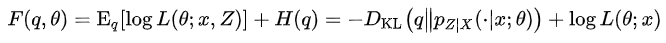

где q — распределение вероятностей ненаблюдаемых переменных Z; pZ|X(· |x;θ) — условное распределение ненаблюдаемых переменных при фиксированных наблюдаемых x и параметрах θ; H — энтропия и DKL — расстояние Кульбака-Лейблера.

Тогда шаги EM-алгоритма можно представить как:



E(xpectation) шаг: Выбираем q, чтобы максимизировать F:

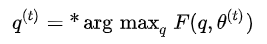

M(aximization) шаг: Выбираем θ, чтобы максимизировать F:


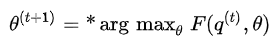

Реализация

EM алгоритм реализован в модуле sklearn.mixture 

In [1]:
!wget https://cdn.analyticsvidhya.com/wp-content/uploads/2019/10/Clustering_gmm.csv

--2021-07-16 08:26:46--  https://cdn.analyticsvidhya.com/wp-content/uploads/2019/10/Clustering_gmm.csv
Resolving cdn.analyticsvidhya.com (cdn.analyticsvidhya.com)... 104.22.55.101, 172.67.38.119, 104.22.54.101, ...
Connecting to cdn.analyticsvidhya.com (cdn.analyticsvidhya.com)|104.22.55.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18385 (18K) [text/csv]
Saving to: ‘Clustering_gmm.csv’

Clustering_gmm.csv  100%[===================>]  17.95K  --.-KB/s    in 0s      

2021-07-16 08:26:48 (105 MB/s) - ‘Clustering_gmm.csv’ saved [18385/18385]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Clustering_gmm.csv')
print(data)

        Weight      Height
0    67.062924  176.086355
1    68.804094  178.388669
2    60.930863  170.284496
3    59.733843  168.691992
4    65.431230  173.763679
..         ...         ...
495  59.976983  169.679741
496  66.423814  174.625574
497  53.604698  161.919208
498  50.433644  160.794875
499  60.224392  169.689709

[500 rows x 2 columns]


Отображение данных

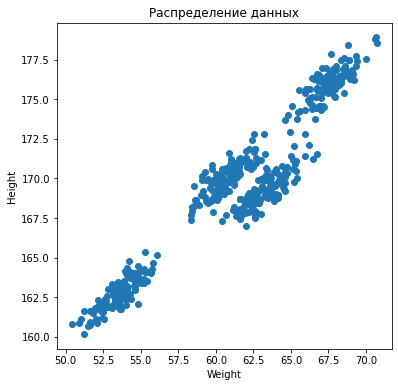

In [4]:
plt.figure(figsize=(6,6))
plt.scatter(data["Weight"],data["Height"])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Распределение данных')
plt.show()

EM алгоритм

In [5]:
from sklearn.mixture import GaussianMixture
x = data
gmm = GaussianMixture(n_components=4)
gmm.fit(x)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

Вероятность попадания точек в разные кластеры

In [6]:
probs = gmm.predict_proba(x)
print(probs[:5].round(3))

[[0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.002 0.998 0.    0.   ]]


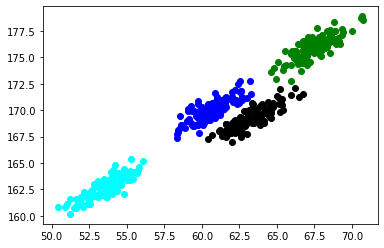

In [7]:
labels = gmm.predict(x)
frame = pd.DataFrame(x)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    x = frame[frame["cluster"]==k]
    plt.scatter(x["Weight"],x["Height"],c=color[k])
plt.show()


Сравнение EM алгоритма с KMeans (алгоритм кластеризации, построенный на идее EM-алгоритма).



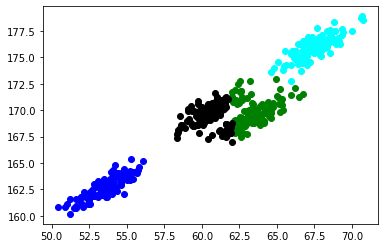

In [10]:
from sklearn.cluster import KMeans
y = data
kmeans = KMeans(n_clusters=4)
kmeans.fit(y)

pred = kmeans.predict(y)
frame = pd.DataFrame(y)
frame['cluster'] = pred
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    y = frame[frame["cluster"]==k]
    plt.scatter(y["Weight"],y["Height"],c=color[k])
plt.show()

Среди преимуществ EM-алгоритма можно выделить следующие: наличие формальной статистической основы, линейное увеличение сложности при росте объема данных(масштабируемость), устойчивость к шумам и пропускам в данных, возможность построения желаемого числа кластеров. быстрая сходимость при удачной инициализации.

Однако алгоритм имеет и ряд недостатков. Во-первых, предположение о нормальности всех переменных модели (измерений данных) является нереалистичным, что делает алгоритм эвристическим. Во-вторых, при неудачной инициализации сходимость алгоритма может оказаться медленной.